<a href="https://colab.research.google.com/github/ssuzana/Data-Exploration-and-Visualization/blob/main/Analyzing%20the%20Nobel%20Prize%20with%20Plotly%2C%20Matplotlib%20%26%20Seaborn/Nobel_Prize_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
#%pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [7]:
df_data.year.min()

1901

In [8]:
df_data.year.max()

2020

In [9]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE



* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
df_data.duplicated().values.any()

False

### Check for NaN Values

In [11]:
df_data.isna().values.any()

True

In [12]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [13]:
df_data.loc[df_data.birth_date.isna()].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations.** Filtering on the `NaN` values in the birth date column we see that we get back data with `laureate_type`="Organization". We also see that since the organization's name is in the `full_name` column, the `organization_name` column contains `NaN`.

In [14]:
df_data.loc[df_data.organization_name.isna()].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


**Observations.** When we look at data where the `organization_name` column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute (with `laureate_type`="Individual").

### Type Conversions


#### Convert Birth Date to Datetime

In [15]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

In [17]:
separated_values = df_data.prize_share.str.split('/', expand=True)
a = pd.to_numeric(separated_values[0])
b = pd.to_numeric(separated_values[1])
df_data['share_pct'] = a / b

In [18]:
df_data['share_pct']

0     1.00
1     1.00
2     1.00
3     0.50
4     0.50
      ... 
957   0.33
958   1.00
959   0.25
960   0.25
961   0.50
Name: share_pct, Length: 962, dtype: float64

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

 Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [19]:
fig = px.pie(values=df_data.sex.value_counts(), 
             names=df_data.sex.value_counts().index,
             hole=0.2,
             title="Percentage of Male vs. Female Winners")
fig.update_traces(textfont_size=14)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

* What are the names of the first 3 female Nobel laureates? 
* What did they win the prize for? 
* What do you see in their `birth_country`? Were they part of an organization?

In [20]:
df_data[df_data.sex=="Female"].sort_values("year")[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

Did some people get a Nobel Prize more than once? If so, who were they? 

In [21]:
repeat_winners = df_data.duplicated(subset=['full_name'],keep=False)
df_data[repeat_winners].full_name.nunique()

6

In [22]:
df_data[repeat_winners][['year', 'category', 'laureate_type', 'full_name']]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


**Observations.** There are 6 winners who were awarded the prize more than once. Only 4 of the repeat laureates were individuals. We see that Marie Curie got the Nobel prize twice - once in physics and once in chemistry. 

# Number of Prizes per Category


* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [23]:
df_data.category.value_counts()

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [24]:
df_data.category.nunique()

6

In [25]:
fig = px.bar(x=df_data.category.value_counts().index,
             y=df_data.category.value_counts(),
             color = df_data.category.value_counts(),
             color_continuous_scale='Aggrnyl')

fig.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
fig.show()


* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [26]:
df_data[df_data.category == "Economics"].sort_values('year').iloc[0]

year                                                                  1969
category                                                         Economics
prize                    The Sveriges Riksbank Prize in Economic Scienc...
motivation               "for having developed and applied dynamic mode...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                    Jan Tinbergen
birth_date                                             1903-04-12 00:00:00
birth_city                                                       the Hague
birth_country                                                  Netherlands
birth_country_current                                          Netherlands
sex                                                                   Male
organization_name                      The Netherlands School of Economics
organization_city        

**Observations.** The economics prize is much newer. It was first awarded in 1969, compared to 1901 for physics. 

# Male and Female Winners by Category

* Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?


In [27]:
cat_split = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_split.sort_values('prize', ascending=False, inplace=True)

fig = px.bar(x=cat_split.category,
             y=cat_split.prize,
             color = cat_split.sex,
             title='Number of Prizes Awarded per Category split by Men and Women')

fig.update_layout(xaxis_title='Nobel Prize Category', 
                  yaxis_title='Number of Prizes')
fig.show()

# Number of Prizes Awarded Over Time

* Are more prizes awarded recently than when the prize was first created? We show the trend in awards visually. 



In [28]:
prizes_per_year = df_data.groupby(['year']).count().prize 
prizes_per_year

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

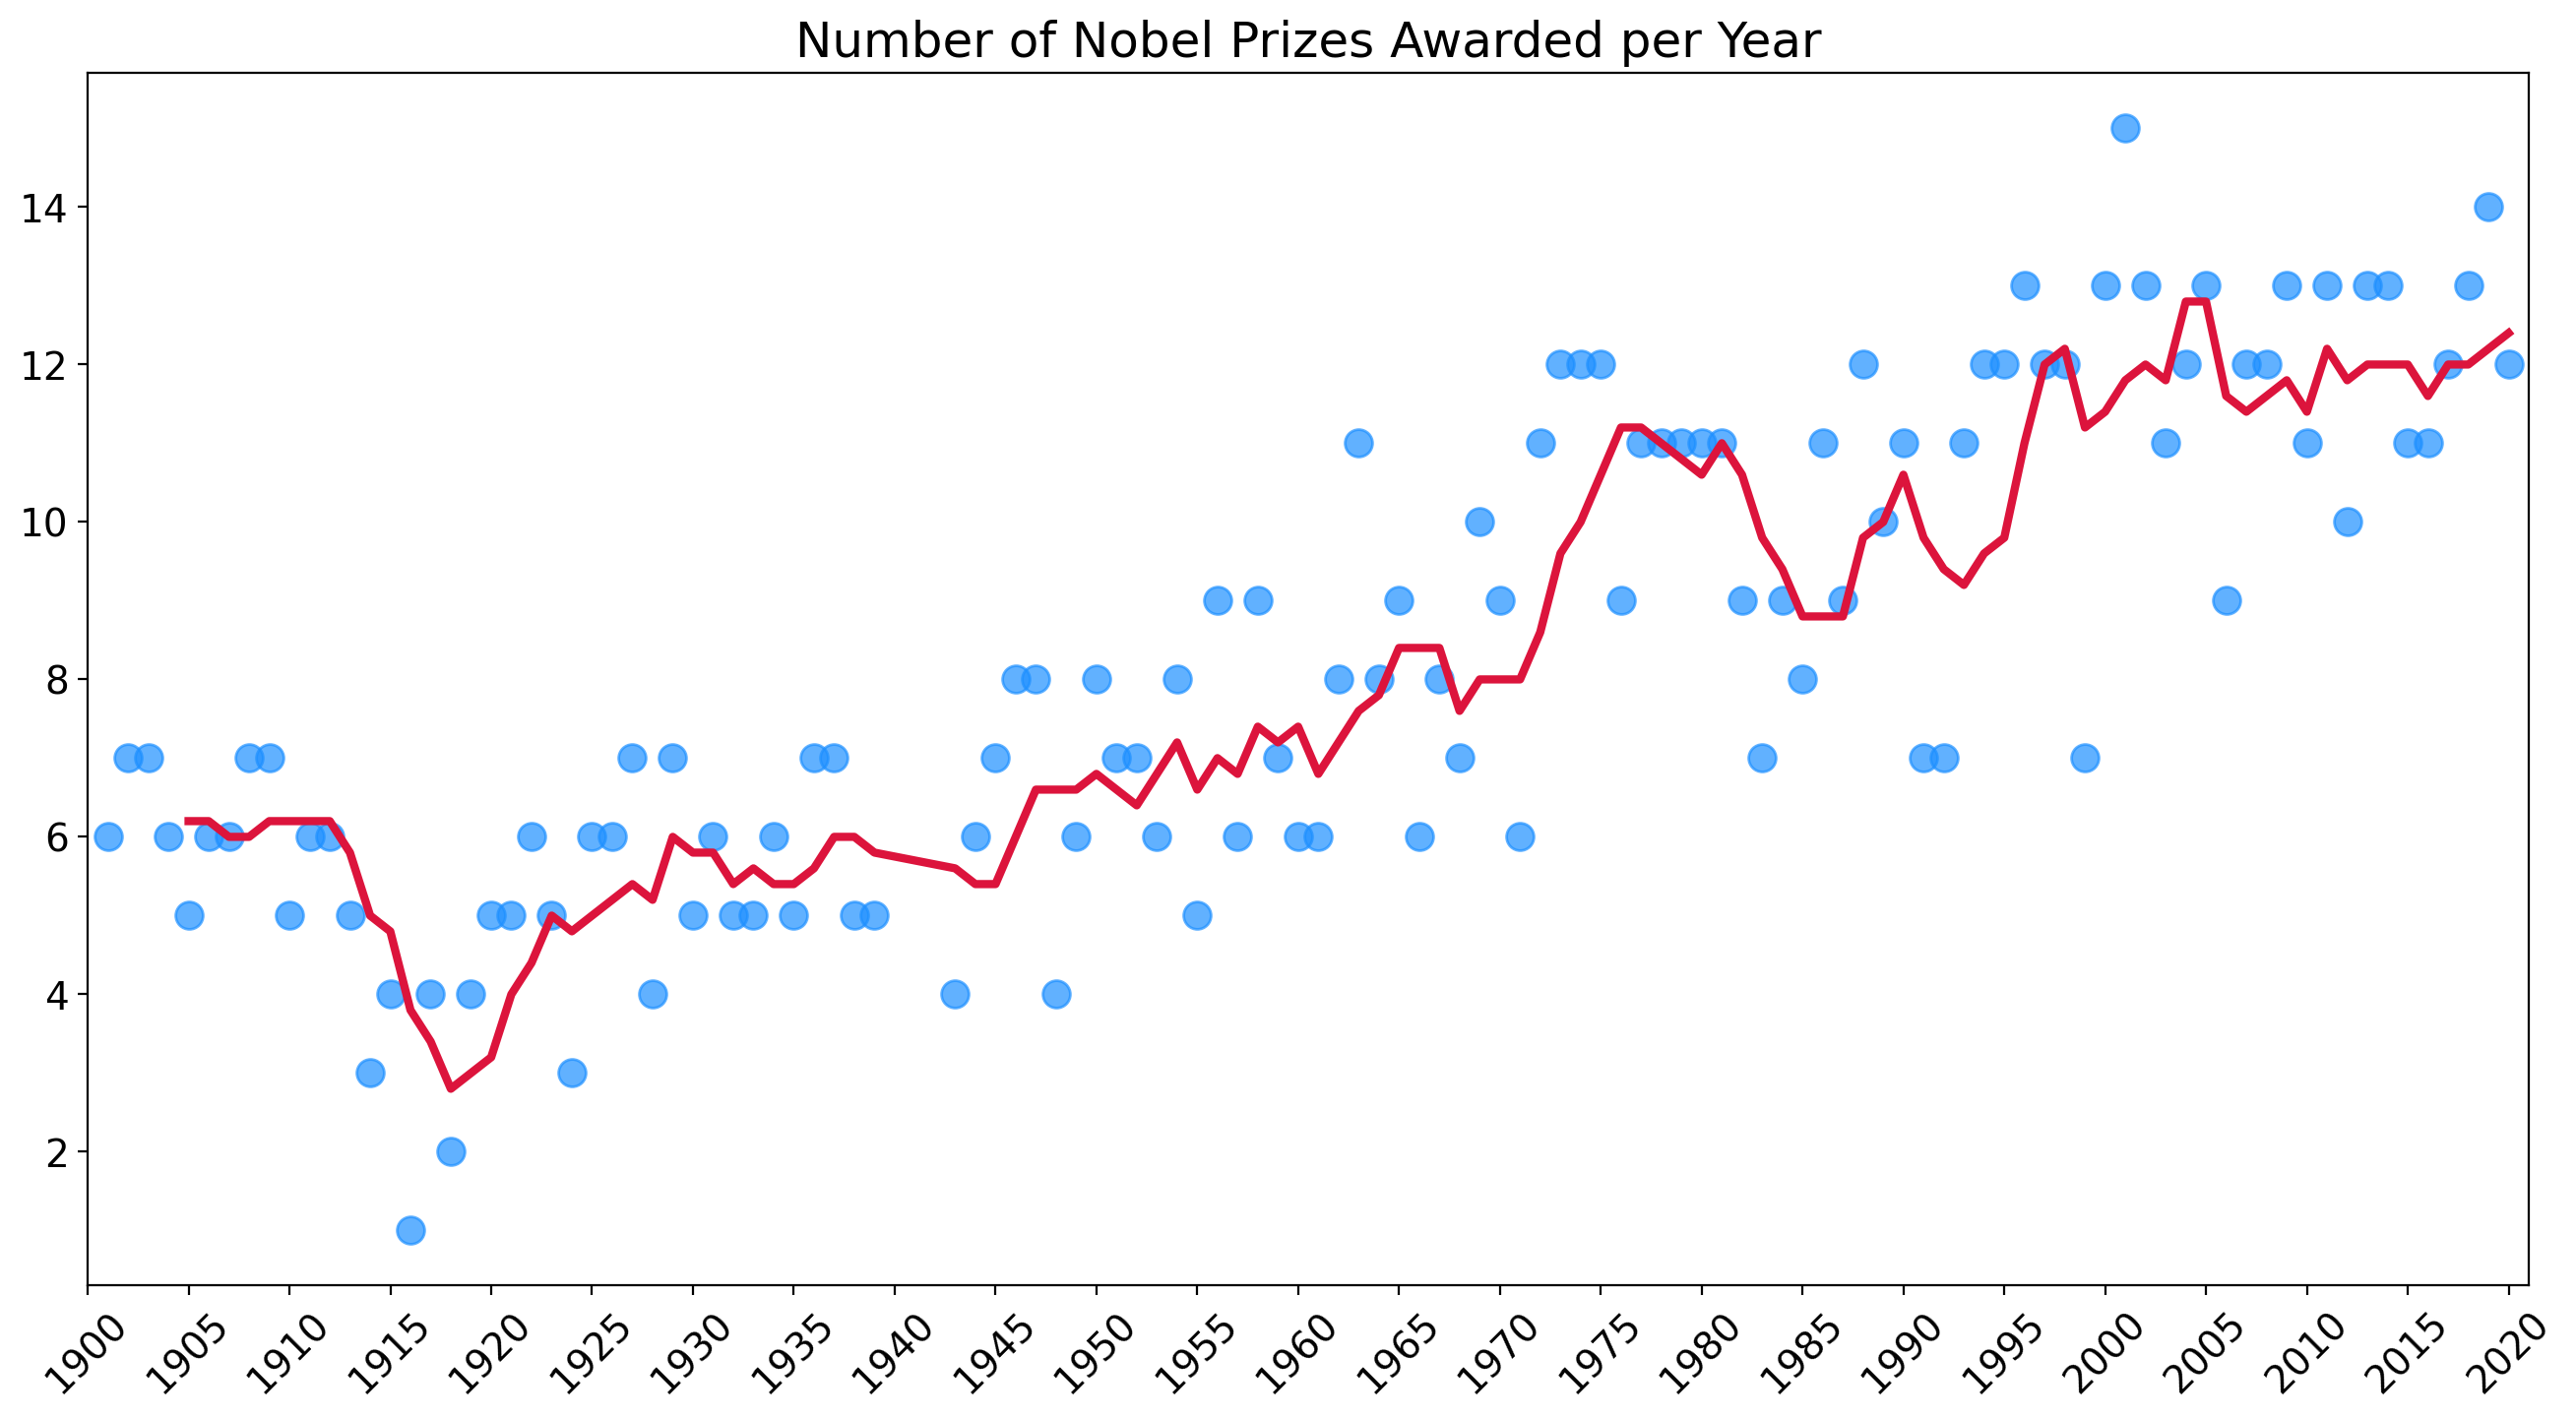

In [29]:
five_year_moving_avg = prizes_per_year.rolling(window=5).mean()
min_year = prizes_per_year.index.min()
max_year = prizes_per_year.index.max()

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)

ax = plt.gca()

ax.set_xlim(min_year - 1, max_year + 1)

plt.scatter(x=prizes_per_year.index, 
           y=prizes_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
plt.plot(prizes_per_year.index, 
         five_year_moving_avg.values, 
         c='crimson',
         linewidth=3)

# format the ticks
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(min_year - 1, max_year + 1, step=5), 
           fontsize=14, 
           rotation=45)

plt.show()

# The Countries with the Most Nobel Prizes

* What is the ranking for the top 20 countries in terms of the number of prizes? We use plotly to create a horizontal bar chart showing the number of prizes won by each country. 

In [30]:
prizes_per_country = df_data.groupby(['birth_country_current']).count().prize 
prizes_per_country

birth_country_current
Algeria                       2
Argentina                     4
Australia                    10
Austria                      18
Azerbaijan                    1
                           ... 
United States of America    281
Venezuela                     1
Vietnam                       1
Yemen                         1
Zimbabwe                      1
Name: prize, Length: 79, dtype: int64

In [31]:
top_countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
top_countries.sort_values(by='prize', ascending=False, inplace=True)
top20_countries = top_countries[:20]
top20_countries

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
40,Japan,27
57,Poland,27
61,Russia,26
11,Canada,20
68,Switzerland,19


In [32]:
h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/) to show the number of prizes won by country.



In [33]:
df_countries = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False)

c_map = px.choropleth(df_countries,
                      locations='birth_country_current',
                      locationmode='country names',
                      color='prize',
                      hover_name='birth_country_current',
                      color_continuous_scale='matter')

c_map.update_layout(coloraxis_showscale=True)
 
c_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

In [36]:
categ_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count})

In [38]:
categ_country.sort_values(by='prize', ascending=False, inplace=True)
categ_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
42,Croatia,Chemistry,1
50,Denmark,Chemistry,1
134,Netherlands,Peace,1
105,Italy,Economics,1


In [39]:
merged_df = pd.merge(categ_country, top20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
merged_df.sort_values(by='total_prize', inplace=True)

In [40]:
merged_df

,birth_country_current,category,cat_prize,total_prize
108,India,Chemistry,1,9
107,India,Peace,1,9
88,Belgium,Medicine,3,9
89,Belgium,Peace,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [48]:
h_bar = px.bar(x=merged_df.cat_prize,
               y=merged_df.birth_country_current,
               orientation='h',
               color=merged_df.category,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes and Category')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

# Number of Prizes Won by Each Country Over Time



In [49]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [50]:
cumul_prizes = prize_by_year.groupby(by=['birth_country_current','year']).sum().groupby(level=[0]).cumsum()
cumul_prizes.reset_index(inplace=True) 

In [54]:
line_chart = px.line(cumul_prizes,
                     x='year', 
                     y='prize',
                     color='birth_country_current',
                     hover_name='birth_country_current')
    
line_chart.update_layout(xaxis_title='Year',
                         yaxis_title='Number of Prizes')
 
line_chart.show();

# What are the Top Research Organizations?


In [60]:
top_organizations = df_data.groupby(['organization_name'], as_index=False).agg({'prize': pd.Series.count})
top_organizations.sort_values(by='prize', ascending=False, inplace=True)
top20_organizations = top_organizations[:20]

In [61]:
h_bar = px.bar(x=top20_organizations.prize,
               y=top20_organizations.organization_name,
               orientation='h',
               color=top20_organizations.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Organizations by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Organization',
                    coloraxis_showscale=False)
h_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [62]:
top_cities = df_data.groupby(['organization_city'], as_index=False).agg({'prize': pd.Series.count})
top_cities.sort_values(by='prize', ascending=False, inplace=True)
top20_cities = top_cities[:20]

In [65]:
h_bar = px.bar(x=top20_cities.prize,
               y=top20_cities.organization_city,
               orientation='h',
               color=top20_cities.prize,
               color_continuous_scale=px.colors.sequential.Plasma,
               title='Top 20 Cities by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
h_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 




In [66]:
top20_cities = df_data.birth_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)

In [67]:
city_bar = px.bar(x=top20_cities.values,
                  y=top20_cities.index,
                  orientation='h',
                  color=top20_cities.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Where were the Nobel Laureates Born?')
 
city_bar.update_layout(xaxis_title='Number of Prizes', 
                       yaxis_title='City of Birth',
                       coloraxis_showscale=False)
city_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organization




In [78]:
df_organizations = df_data.groupby(['organization_country', 
                                    'organization_city', 
                                    'organization_name'], as_index=False).agg({'prize': pd.Series.count})
df_organizations.sort_values(by='prize', ascending=False, inplace=True)

In [90]:
fig = px.sunburst(df_organizations, path=['organization_country', 'organization_city', 'organization_name'], values='prize')
fig.update_layout(
    margin = dict(t = 0, l = 0, r = 0, b = 0)
)
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?




In [117]:
df_data['age'] = df_data.year - df_data.birth_date.dt.year
df_data['age']

0     49.00
1     62.00
2     47.00
3     79.00
4     73.00
       ... 
957   71.00
958     NaN
959   55.00
960   68.00
961   89.00
Name: age, Length: 962, dtype: float64

In [113]:
df_data.head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00


### Who were the oldest and youngest winners?



In [114]:
display(df_data.nlargest(n=1, columns='age'))
display(df_data.nsmallest(n=1, columns='age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


### Descriptive Statistics for the Laureate Age at Time of Award


In [119]:
age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
dtype: float64

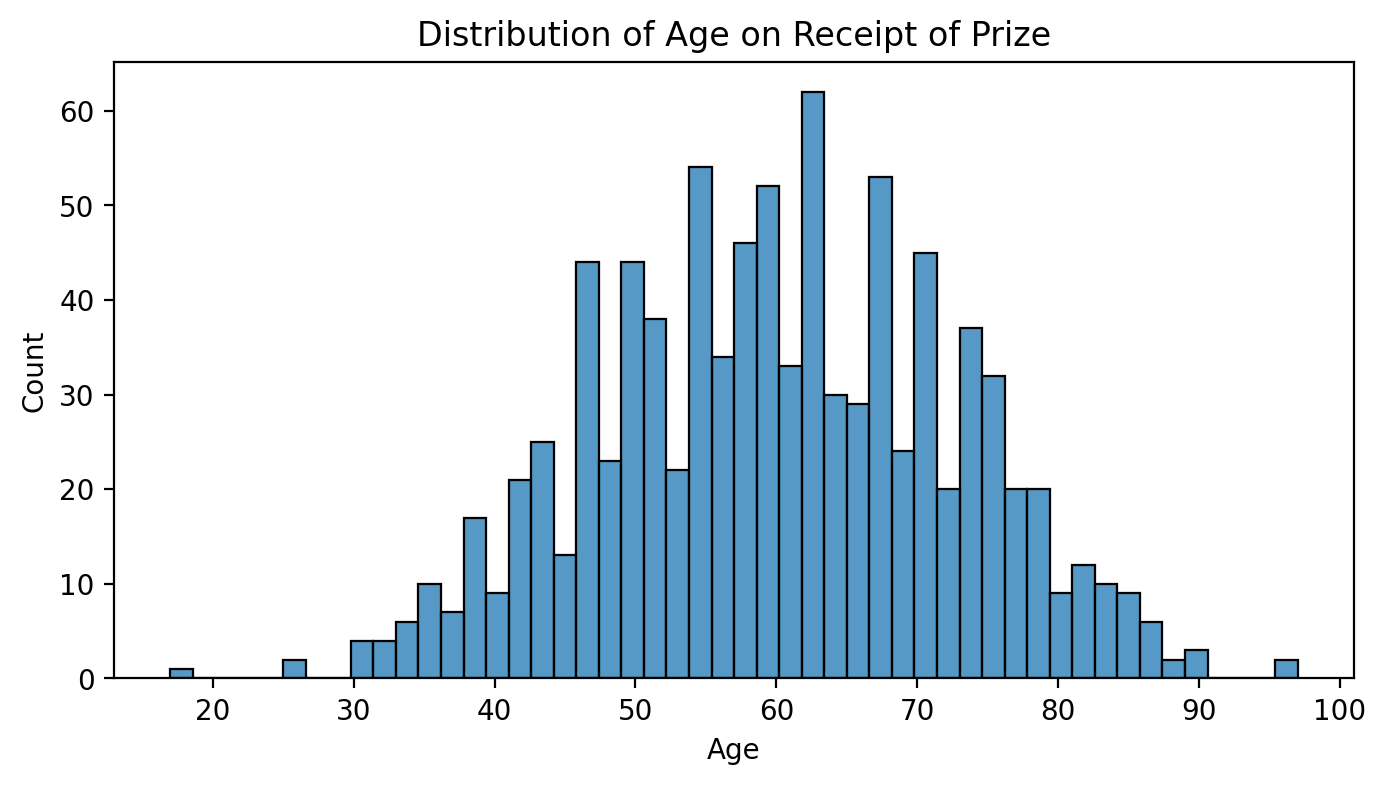

In [121]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.age,
             bins=50)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?




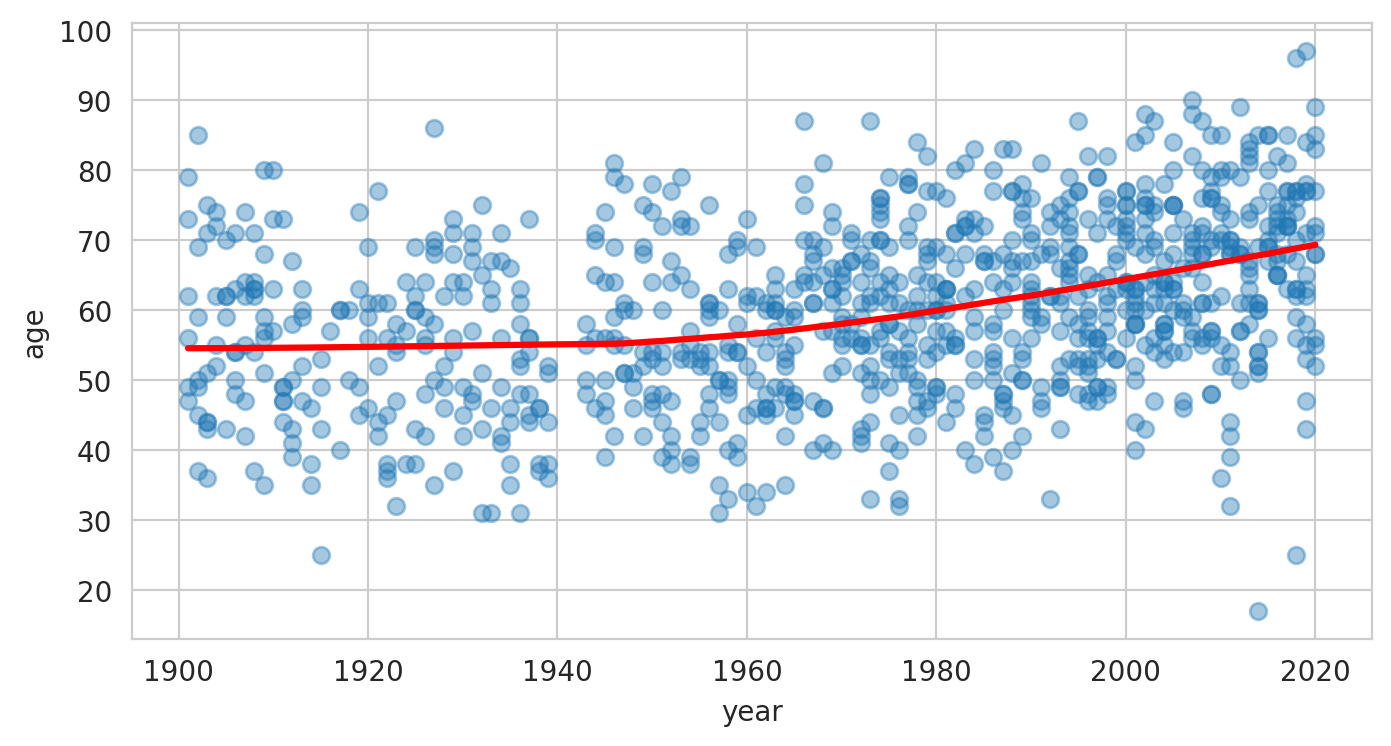

In [123]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.regplot(data=df_data,
                x='year',
                y='age',
                lowess=True, 
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'red'})
 
plt.show()

## Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 


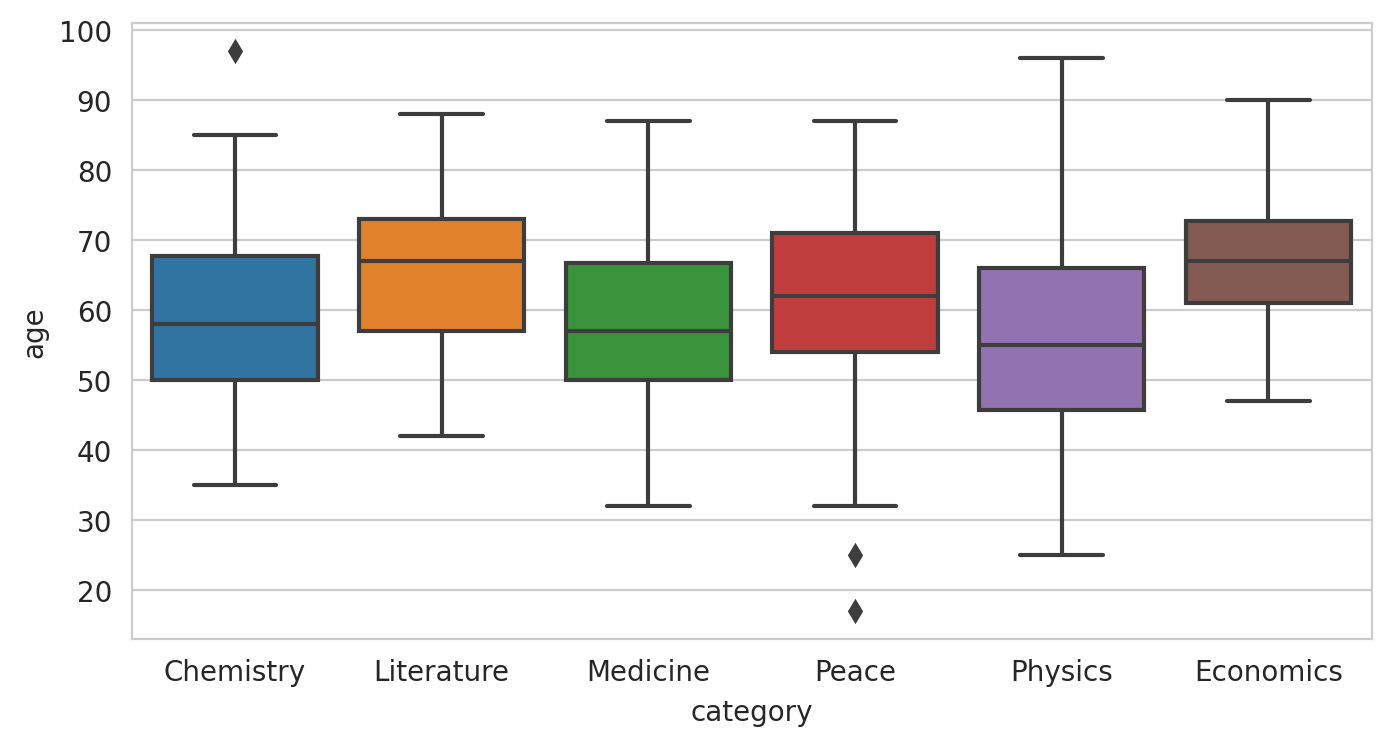

In [125]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("whitegrid"):
    sns.boxplot(data=df_data,
                x='category',
                y='age')
 
plt.show()

##  Laureate Age over Time by Category

* Which category has the age trending up and which category has the age trending down? 



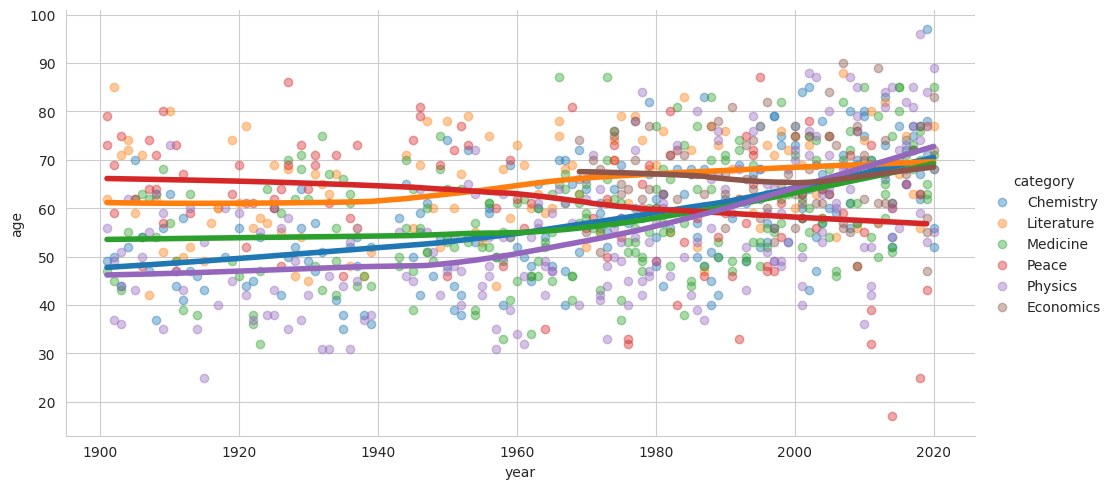

In [134]:
with sns.axes_style("whitegrid"):

    sns.lmplot(data=df_data,
               x='year',
               y='age',
               hue='category',
               lowess=True, 
               aspect=2,
               scatter_kws={'alpha': 0.4},
               line_kws={'linewidth': 4})
 
plt.show()

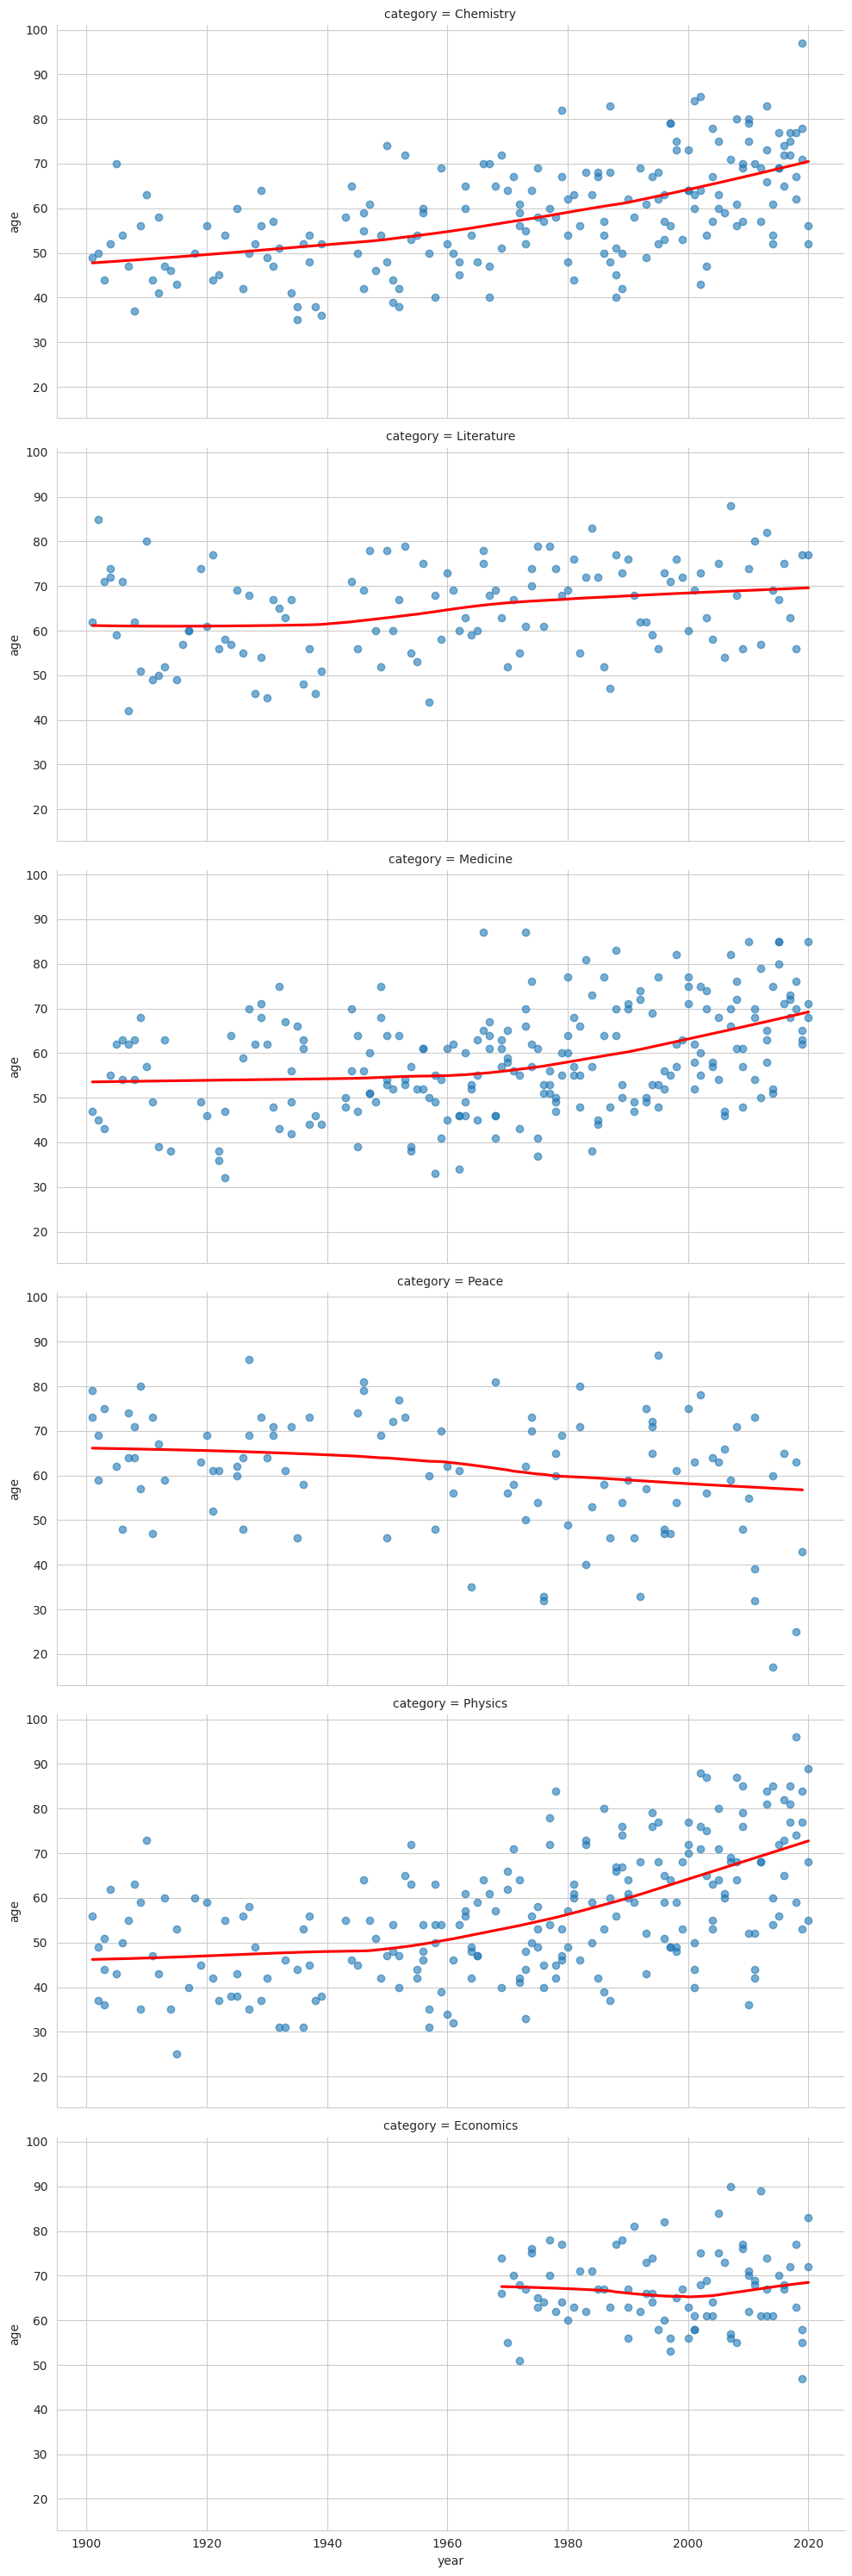

In [128]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'red'},)
 
plt.show()